# Linear Regression Using Tensorflow

### Summary of Linear Regression

Linear Regression is a very common statistical method that allows us to learn a function or relationship from a given set of continuous data. For example, we are given some data points of x and corresponding y and we need to learn the relationship between them that is called a hypothesis.

In case of Linear regression, the hypothesis is a straight line, i.e,
$$ h(x) = wx + b$$ 
Where w is a vector called Weights and b is a scalar called Bias. The Weights and Bias are called the parameters of the model.

All we need to do is estimate the value of w and b from the given set of data such that the resultant hypothesis produces the least cost J which is defined by the following cost function
$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (y_i - h(x_i)) ^ 2 $$
where m is the number of data points in the given dataset. This cost function is also called Mean Squared Error.

For finding the optimized value of the parameters for which J is minimum, we will be using a commonly used optimizer algorithm called Gradient Descent. Following is the pseudo-code for Gradient Descent:

Repeat untill Convergence {
    $$ w = w - \alpha \frac{\delta J}{\delta w}$$
    $$ b = b - \alpha \frac{\delta J}{\delta b}$$
}

where $\alpha$ is a `hyperparameter` called the `Learning Rate`.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In order to make the random numbers predictable, we will define fixed seeds for both Numpy and Tensorflow.

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
#Generating random linear data
#There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

#Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) #Number of data points

Let us visualize the training data.

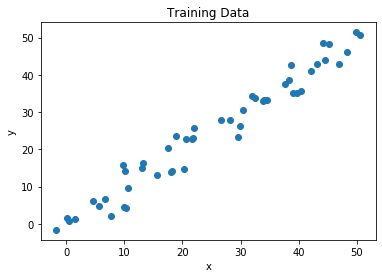

In [4]:
#Plot of Training data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

Creating our model by defining the `placeholders` `X` and `Y`, so that we can feed our `training examples` `X` and `Y` into the `optimizer` during the training process.

In [5]:
X = tf.placeholder(dtype=tf.float32, name='X')
Y = tf.placeholder(dtype=tf.float32, name='Y')

Declaring two trainable Tensorflow Variables for the Weights and Bias and initializing them randomly using `np.random.randn()`.

In [6]:
W = tf.Variable(np.random.randn(), name='W')
b = tf.Variable(np.random.randn(), name='b')

Defining the hyperparameters of the model, the Learning Rate and the number of Epochs.

In [7]:
learning_rate = 0.01
training_epochs = 1000

Now, we will be building the Hypothesis, the Cost Function, and the Optimizer. We won’t be implementing the Gradient Descent Optimizer manually since it is built inside Tensorflow. After that, we will be initializing the Variables.

In [9]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

Now we will begin the training process inside a Tensorflow Session

In [10]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 100 epochs 
        if (epoch + 1) % 100 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "\n\tW =", sess.run(W), "\n\tb =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 100 : cost = 5.79127 
	W = 0.99812365 
	b = 1.0914395
Epoch 200 : cost = 5.6459413 
	W = 1.0031956 
	b = 0.84343934
Epoch 300 : cost = 5.544608 
	W = 1.007242 
	b = 0.6455921
Epoch 400 : cost = 5.473066 
	W = 1.01047 
	b = 0.48775342
Epoch 500 : cost = 5.4219036 
	W = 1.0130452 
	b = 0.36183482
Epoch 600 : cost = 5.3848557 
	W = 1.0150996 
	b = 0.2613811
Epoch 700 : cost = 5.3576994 
	W = 1.0167387 
	b = 0.18124203
Epoch 800 : cost = 5.337558 
	W = 1.0180461 
	b = 0.11730931
Epoch 900 : cost = 5.322459 
	W = 1.0190892 
	b = 0.06630575
Epoch 1000 : cost = 5.3110332 
	W = 1.0199214 
	b = 0.02561658


Now let us look at the result.

In [11]:
#Calculating the predictions
predictions = weight*x + bias
print("Training cost = ", training_cost,
      "\nWeight = ", weight,
      "\nbias = ", bias, '\n')

Training cost =  5.3110332 
Weight =  1.0199214 
bias =  0.02561658 



Finally, we will plot our result.

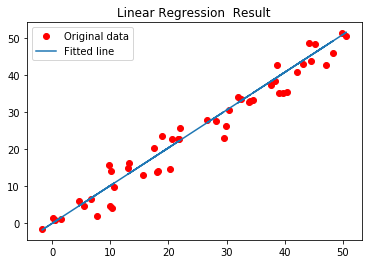

In [12]:
#Ploting the Results
plt.plot(x,y,'ro', label='Original data')
plt.plot(x, predictions, label='Fitted line')
plt.title('Linear Regression  Result')
plt.legend()
plt.show()

#### Link original document:
https://www.geeksforgeeks.org/linear-regression-using-tensorflow/